In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Data

df = pd.read_csv('ratings_Beauty.csv')

print("Shape: ", df.shape)
print("Columns: ", df.columns)

df.head()

('Shape: ', (2023070, 4))
('Columns: ', Index([u'UserId', u'ProductId', u'Rating', u'Timestamp'], dtype='object'))


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
print("Unique UserId count: ", df.UserId.nunique())
print("Unique ProductId count: ", df.ProductId.nunique())

('Unique UserId count: ', 1210271)
('Unique ProductId count: ', 249274)


/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


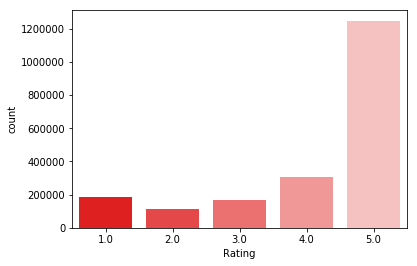

In [4]:
sns.countplot(x='Rating', data=df, palette=sns.light_palette('red', reverse=True))

In [5]:
product_rating = df.groupby('ProductId')['Rating'].mean()
product_rating.head()

ProductId
0205616461    5.0
0558925278    4.0
0733001998    4.0
0737104473    1.0
0762451459    5.0
Name: Rating, dtype: float64

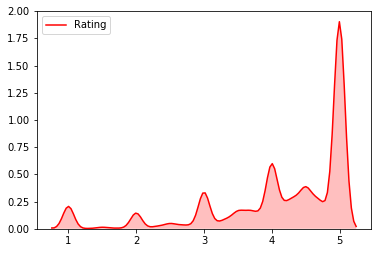

In [6]:
sns.kdeplot(product_rating, shade=True, color='red')

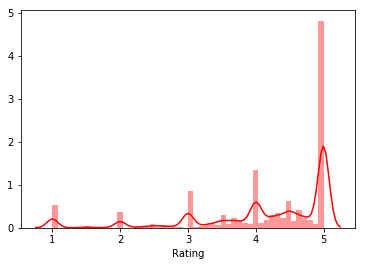

In [7]:
sns.distplot(product_rating, color='red')

In [8]:
product_rating_count = df.groupby('ProductId')['Rating'].count()
product_rating_count.head()

ProductId
0205616461    1
0558925278    2
0733001998    1
0737104473    1
0762451459    1
Name: Rating, dtype: int64

In [9]:
unique_products = df.ProductId.unique()
product_details = pd.DataFrame({'Mean_rating': product_rating[unique_products],\
                                'Count': product_rating_count[unique_products]})
product_details.head()

,Count,Mean_rating
ProductId,,
0205616461,1,5.0
0558925278,2,4.0
0733001998,1,4.0
0737104473,1,1.0
0762451459,1,5.0


In [10]:
print(product_details['Count'].max())

7533


/usr/lib/python2.7/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


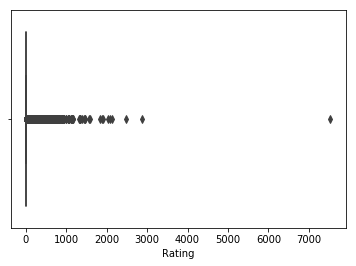

In [11]:
sns.boxplot(product_rating_count)

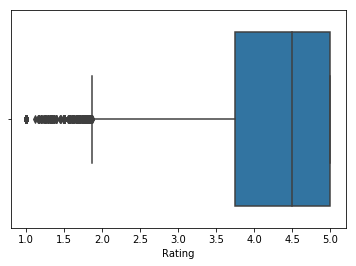

In [12]:
sns.boxplot(product_rating)

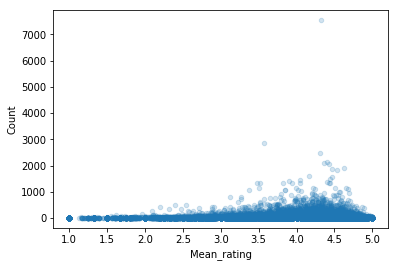

In [13]:
product_details.plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.2)

In [14]:
print("Mean rating: ", product_details['Mean_rating'].mean())
print("Median rating: ", np.median(product_details['Mean_rating']))

('Mean rating: ', 4.149251141223176)
('Median rating: ', 4.5)


In [15]:
print("Weighted mean rating: ", (product_rating*product_rating_count).sum()/product_rating_count.sum())

('Weighted mean rating: ', 4.149035871225415)


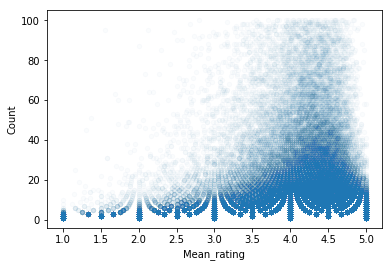

In [16]:
# Less than 100 ratings
product_details[product_details['Count']<101].plot(kind='scatter', x='Mean_rating', y='Count', alpha=0.02)

In [17]:
value = product_details[product_details['Count']<10]
print(value.shape)

(212336, 2)


In [18]:
# Product categories - Beauty has 7 major categories

pid = df.ProductId.copy()
pid.head()

0    0205616461
1    0558925278
2    0558925278
3    0733001998
4    0737104473
Name: ProductId, dtype: object

In [19]:
type(pid[0])

str

In [20]:
pid_cat1 = np.array([each[:1] for each in pid])
print(pid_cat1[:10])

['0' '0' '0' '0' '0' '0' '1' '1' '1' '1']


In [21]:
print("Cat1 eval: ", len(np.unique(pid_cat1)))
print("Cat1 eval: ", np.unique(pid_cat1))

('Cat1 eval: ', 10)
('Cat1 eval: ', array(['0', '1', '3', '4', '5', '6', '7', '8', '9', 'B'], dtype='|S1'))


In [22]:
print(df.ProductId.unique())

['0205616461' '0558925278' '0733001998' ... 'B00LP2YB8E' 'B00LPVG6V0'
 'B00LU0LTOU']


In [23]:
print(product_details.columns)

Index([u'Count', u'Mean_rating'], dtype='object')


In [24]:
product_details['Cat1'] = np.array([each[:1] for each in product_details.index])
product_details.head()

,Count,Mean_rating,Cat1
ProductId,,,
0205616461,1,5.0,0
0558925278,2,4.0,0
0733001998,1,4.0,0
0737104473,1,1.0,0
0762451459,1,5.0,0


In [25]:
cat1 = product_details.groupby(by='Cat1')
cat1['Count'].sum()

Cat1
0          6
1        124
3         38
4         13
5         62
6         71
7         77
8         40
9       1819
B    2020820
Name: Count, dtype: int64

In [26]:
cat1['Mean_rating'].mean()

Cat1
0    3.800000
1    4.061202
3    3.556190
4    3.812500
5    4.656407
6    3.763454
7    3.656079
8    3.702083
9    4.256487
B    4.149144
Name: Mean_rating, dtype: float64